In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

 
import warnings
warnings.filterwarnings('ignore')

In [103]:
food_prices = pd.read_csv('food.csv',sep=',', encoding='latin-1')

In [104]:
food_prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


exploring the data

In [105]:
food_prices.shape

(743914, 18)

Checking for null values

In [108]:
#filling forward since its a text value
food_prices = food_prices.fillna('ffill')

In [109]:
#to confirm null values removal
food_prices.isnull().sum()

adm0_id               0
adm0_name             0
adm1_id               0
adm1_name             0
mkt_id                0
mkt_name              0
cm_id                 0
cm_name               0
cur_id                0
cur_name              0
pt_id                 0
pt_name               0
um_id                 0
um_name               0
mp_month              0
mp_year               0
mp_price              0
mp_commoditysource    0
dtype: int64

In [111]:
food_prices['cm_name'].unique()

array(['Bread', 'Wheat', 'Rice (low quality)', 'Wage (qualified labour)',
       'Livestock (sheep, one-year-old alive female)', 'Fuel (diesel)',
       'Exchange rate', 'Wage (non-qualified labour, non-agricultural)',
       'Rice', 'Beans (white)', 'Milk', 'Potatoes', 'Eggs',
       'Meat (chicken)', 'Sugar', 'Lentils', 'Pasta', 'Tomatoes', 'Oil',
       'Cheese (dry)', 'Carrots', 'Onions', 'Bananas', 'Tea',
       'Fuel (petrol-gasoline)', 'Fish (canned)', 'Apples',
       'Milk (camel)', 'Meat (camel)', 'Tea (sahm)', 'Wheat flour',
       'Oil (vegetable)', 'Rice (white)', 'Meat (pork)', 'Meat (beef)',
       'Cabbage', 'Apples (red)', 'Cucumbers (greenhouse)',
       'Fuel (kerosene)', 'Fish (fresh)', 'Bread (high grade flour)',
       'Bread (first grade flour)', 'Milk (non-pasteurized)',
       'Rice (coarse)', 'Lentils (masur)', 'Oil (palm)',
       'Rice (imported)', 'Sorghum', 'Maize (white)',
       'Cassava meal (gari)', 'Maize', 'Millet', 'Rice (local)',
       'Rice (impo

## Prediction

#### Feature Selection

In [123]:
#dropping the ids first since they are not likely to be of use
food_prices=food_prices.drop(['adm0_id', 'adm1_id', 'mkt_id', 'cm_id', 'cur_id', 'pt_id', 'um_id'],axis='columns')
food_prices.head()

,adm0_name,adm1_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,mp_commoditysource,Date
432161,Nigeria,Sokoto,Illela (CBM),Maize,NGN,Wholesale,KG,1,2002,153.3485,SIMA - Niger,2002-01-01
432162,Nigeria,Sokoto,Illela (CBM),Maize,NGN,Wholesale,KG,3,2002,171.2454,SIMA - Niger,2002-03-01
432163,Nigeria,Sokoto,Illela (CBM),Maize,NGN,Wholesale,KG,4,2002,188.3671,SIMA - Niger,2002-04-01
432164,Nigeria,Sokoto,Illela (CBM),Maize,NGN,Wholesale,KG,5,2002,189.0390,SIMA - Niger,2002-05-01
432165,Nigeria,Sokoto,Illela (CBM),Maize,NGN,Wholesale,KG,6,2002,187.8219,SIMA - Niger,2002-06-01


food_prices.corr()

### Encoding the string columns to see their effects

Used label encoder due to the number of items in each columns altough this has its limitations in terms of unsolicited ranking

In [125]:
from sklearn.preprocessing import LabelEncoder

le_adm_name=LabelEncoder()
le_cm_name=LabelEncoder()
le_pt_name=LabelEncoder()
le_mkt_name=LabelEncoder()

In [126]:
food_prices['adm1_name']=le_adm_name.fit_transform(food_prices['adm1_name'])
food_prices['cm_name']=le_cm_name.fit_transform(food_prices['cm_name'])
food_prices['pt_name']=le_pt_name.fit_transform(food_prices['pt_name'])
food_prices['mkt_name']=le_mkt_name.fit_transform(food_prices['mkt_name'])

In [127]:
food_prices.corr()

,adm1_name,mkt_name,cm_name,pt_name,mp_month,mp_year,mp_price
adm1_name,1.000000,0.094158,0.036981,0.044423,-0.000916,-0.087195,-0.020866
mkt_name,0.094158,1.000000,0.058562,0.059386,-0.002801,-0.082245,-0.037709
cm_name,0.036981,0.058562,1.000000,0.443753,-0.005326,-0.175496,0.060210
pt_name,0.044423,0.059386,0.443753,1.000000,0.000257,-0.175990,0.381454
mp_month,-0.000916,-0.002801,-0.005326,0.000257,1.000000,-0.111250,-0.007513
mp_year,-0.087195,-0.082245,-0.175496,-0.175990,-0.111250,1.000000,0.391723
mp_price,-0.020866,-0.037709,0.060210,0.381454,-0.007513,0.391723,1.000000


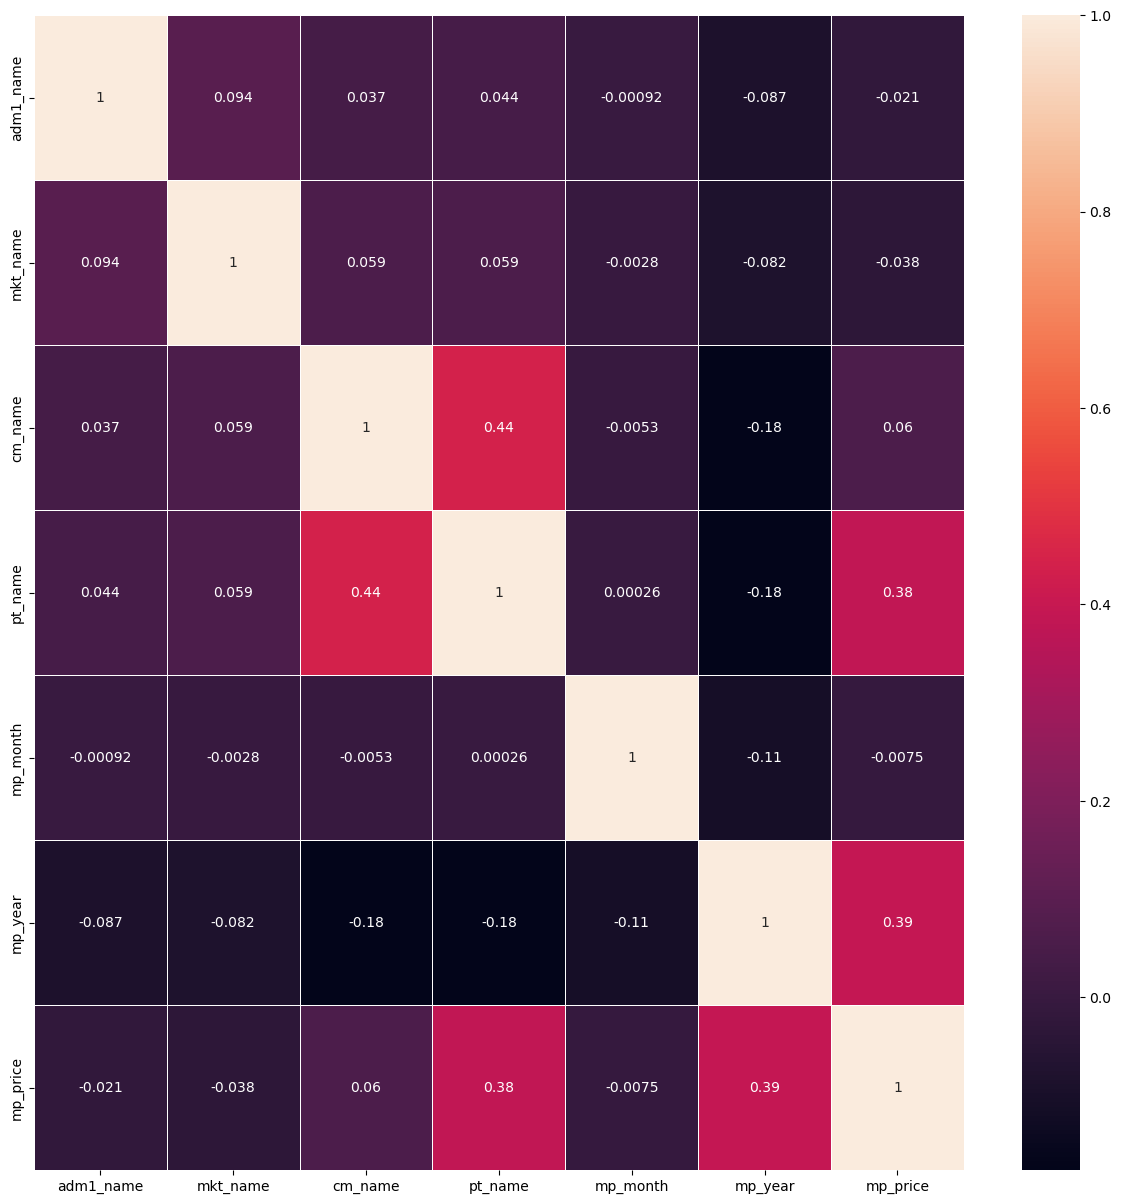

In [184]:
#heatmap to visualize the correlation
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(food_prices.corr(), annot=True, linewidths=.5, ax=ax, color = 'green');

In [187]:
food_prices.head()

,adm0_name,adm1_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,mp_commoditysource,Date
432161,Nigeria,11,11,9,NGN,1,KG,1,2002,153.3485,SIMA - Niger,2002-01-01
432162,Nigeria,11,11,9,NGN,1,KG,3,2002,171.2454,SIMA - Niger,2002-03-01
432163,Nigeria,11,11,9,NGN,1,KG,4,2002,188.3671,SIMA - Niger,2002-04-01
432164,Nigeria,11,11,9,NGN,1,KG,5,2002,189.0390,SIMA - Niger,2002-05-01
432165,Nigeria,11,11,9,NGN,1,KG,6,2002,187.8219,SIMA - Niger,2002-06-01


In [188]:
food_prices.tail()

,adm0_name,adm1_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,mp_commoditysource,Date
442562,Nigeria,5,20,6,NGN,1,100 KG,1,2017,19475.0,"FEWS NET, Nigeria",2017-01-01
442563,Nigeria,5,20,6,NGN,1,100 KG,2,2017,20700.0,"FEWS NET, Nigeria",2017-02-01
442564,Nigeria,5,20,6,NGN,1,100 KG,3,2017,22380.0,FEWSNET,2017-03-01
442565,Nigeria,5,20,6,NGN,1,100 KG,4,2017,21595.0,FEWS NET,2017-04-01
442566,Nigeria,5,20,6,NGN,1,100 KG,5,2017,22944.0,FEWS NET,2017-05-01


#### Select two food items in Nigeria and predict their prices over the next five years from the last year for which data is available in the dataset.

Question says just year and commodity name so the features will be limited to just those 2

In [137]:
x = food_prices.drop(['adm0_name', 'adm1_name', 'mkt_name', 'cur_name', 'pt_name', 'um_name', 'mp_month', 'mp_price', 'mp_commoditysource', 'Date'], axis = 'columns')
y = food_prices['mp_price']

### Test Train Split

In [140]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, train_size=0.8)

In [146]:
x.shape

(10406, 2)

### Model
decided on linear regression since price is a continous variable, although Naive Bayes or Decision Trees would also work well especially considering the fact that the independent vables include categoricak vakues

In [231]:
model = LinearRegression()  
model.fit(X_train, Y_train)

LinearRegression()

In [238]:
food_price_pred = pd.DataFrame({'Food':[9,9,9,9,9,6,6,6,6,6],
                                'Year':[2018,2019,2020,2021,2022,2018,2019,2020,2021,2022,]})

In [239]:
pred = model.predict(food_price_pred).round(4)
pred

array([12407.162 , 13682.5941, 14958.0262, 16233.4582, 17508.8903,
       11732.4069, 13007.839 , 14283.271 , 15558.7031, 16834.1352])

In [240]:
food_price_pred['Predicted Price(NGN)'] = pred

In [241]:
food_price_pred

,Food,Year,Predicted Price(NGN)
0,9,2018,12407.1620
1,9,2019,13682.5941
2,9,2020,14958.0262
3,9,2021,16233.4582
4,9,2022,17508.8903
5,6,2018,11732.4069
6,6,2019,13007.8390
7,6,2020,14283.2710
8,6,2021,15558.7031
9,6,2022,16834.1352


In [242]:
#Adding the predicted values to the dataframe
food_price_pred['Food'] = food_price_pred['Food'].replace([9,6],['Maize', 'Garri'])

In [243]:
food_price_pred

,Food,Year,Predicted Price(NGN)
0,Maize,2018,12407.1620
1,Maize,2019,13682.5941
2,Maize,2020,14958.0262
3,Maize,2021,16233.4582
4,Maize,2022,17508.8903
5,Garri,2018,11732.4069
6,Garri,2019,13007.8390
7,Garri,2020,14283.2710
8,Garri,2021,15558.7031
9,Garri,2022,16834.1352
